In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('Microsoft.csv')

In [ ]:

df.head()

,Open,High,Low,Close,Adj Close,Volume,Date
0,58.68750,59.3125,56.00000,58.28125,36.361576,53228400,2000-01-03
1,56.78125,58.5625,56.12500,56.31250,35.133263,54119000,2000-01-04
2,55.56250,58.1875,54.68750,56.90625,35.503712,64059600,2000-01-05
3,56.09375,56.9375,54.18750,55.00000,34.314400,54976600,2000-01-06
4,54.31250,56.1250,53.65625,55.71875,34.762833,62013600,2000-01-07


In [ ]:
df1=df.reset_index()['Close']

In [ ]:
df1


0        58.281250
1        56.312500
2        56.906250
3        55.000000
4        55.718750
           ...    
5834    253.919998
5835    260.790009
5836    265.440002
5837    276.200012
5838    279.429993
Name: Close, Length: 5839, dtype: float64

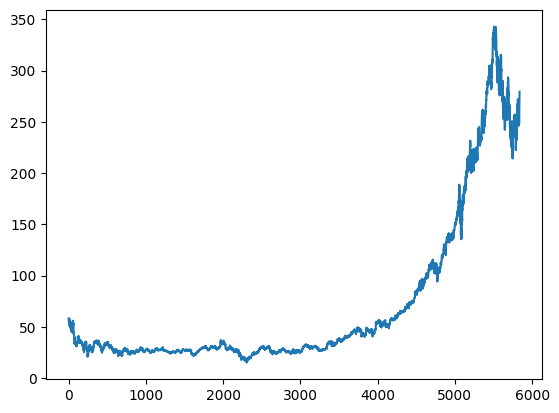

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)

### LSTM are sensitive to the scale of the data. So we apply MinMax scaler

In [ ]:
import numpy as np

reshape(-1,1) will reshape the array in such a way that the resulting array has only 1 column and multiple rows

MinMax scaler will convert the values from 0 to 1

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
df1

array([[0.13151376],
       [0.12551074],
       [0.12732117],
       ...,
       [0.76317238],
       [0.79598129],
       [0.80582999]])

##splitting dataset into train and test split

In [ ]:
training_size=int(len(df1)*0.70)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size,test_size


(4087, 1752)

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----199   200
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
time_step = 150
X_train, Y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)

In [ ]:
X_train.shape, Y_train.shape


((3936, 150), (3936,))

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
import tensorflow as tf
import keras

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(150,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 150, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 150, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
62/62 [==============================] - 13s 46ms/step - loss: 1.8877e-04 - val_loss: 0.0030
Epoch 2/100
62/62 [==============================] - 1s 19ms/step - loss: 2.1129e-05 - val_loss: 0.0013
Epoch 3/100
62/62 [==============================] - 1s 21ms/step - loss: 1.9919e-05 - val_loss: 7.5226e-04
Epoch 4/100
62/62 [==============================] - 1s 19ms/step - loss: 1.9296e-05 - val_loss: 6.4608e-04
Epoch 5/100
62/62 [==============================] - 1s 19ms/step - loss: 1.6299e-05 - val_loss: 0.0016
Epoch 6/100
62/62 [==============================] - 1s 19ms/step - loss: 1.6331e-05 - val_loss: 7.7928e-04
Epoch 7/100
62/62 [==============================] - 1s 19ms/step - loss: 1.5168e-05 - val_loss: 9.9792e-04
Epoch 8/100
62/62 [==============================] - 1s 19ms/step - loss: 1.5152e-05 - val_loss: 0.0012
Epoch 9/100
62/62 [==============================] - 1s 24ms/step - loss: 1.4212e-05 - val_loss: 0.0022
Epoch 10/100
62/62 [===========================

In [ ]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)


51/51 [==============================] - 1s 7ms/step


###Transformback to original form


In [ ]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)


In [ ]:
train_predict.shape, test_predict.shape

((3936, 1), (1601, 1))

#### Calculate RMSE performance metrics

In [ ]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_train,train_predict))

30.88402639751128

#### Test Data RMSE

In [ ]:
math.sqrt(mean_squared_error(Y_test,test_predict))


192.21884629432077

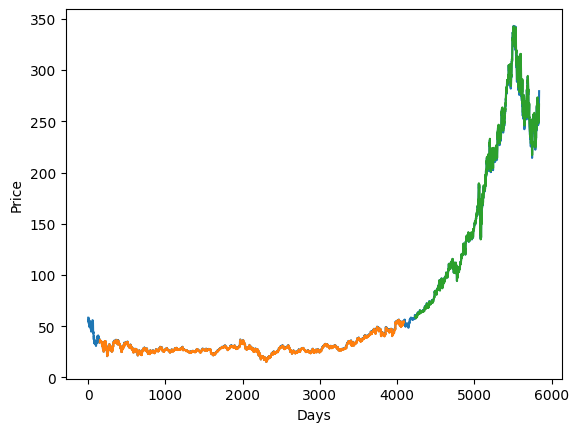

In [ ]:
### Plotting
# shift train predictions for plotting
step=150
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[step:len(train_predict)+step, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(step*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.xlabel('Days')
plt.ylabel('Price')
plt.show()


##Forecasting and predict for future 30 days

In [ ]:
x_input=test_data[len(test_data)-step:].reshape(1,-1)
x_input.shape

(1, 150)

In [ ]:
r_input=list(x_input)
r_input=r_input[0].tolist()

In [ ]:
r_input

[0.8438834494549247,
 0.8486401198612455,
 0.8463227342084615,
 0.8420844606649602,
 0.8385779539369702,
 0.8263203014606636,
 0.8007074393375319,
 0.7967130570482849,
 0.7947311265544426,
 0.8040615256632065,
 0.7712526153274685,
 0.762532083933463,
 0.7556409695782358,
 0.7510672408757927,
 0.7478046254020569,
 0.7345713148559846,
 0.7260032038642946,
 0.7407610906445145,
 0.7420722038732218,
 0.7601841769791164,
 0.7668618283289033,
 0.7221612885037372,
 0.7228625805440603,
 0.7020063888272495,
 0.7000549331085956,
 0.6993841158434604,
 0.6930723479014294,
 0.6824003142623954,
 0.6885900900509251,
 0.6792596909421611,
 0.6778265855599523,
 0.6746554874645297,
 0.6888645491331162,
 0.677979052488642,
 0.6639529325239335,
 0.687858323235414,
 0.7126784224662834,
 0.7136541270624234,
 0.7063056584475016,
 0.6680388321914938,
 0.652823544625205,
 0.6411148103132803,
 0.642151510986171,
 0.6680388321914938,
 0.6507196219778612,
 0.6780705233405809,
 0.6810282049569374,
 0.674868903943595

In [ ]:
x_input.shape

(1, 150)

In [ ]:
from numpy import array

lst_output=[]
n_steps=150
i=0
while(i<30):

    if(len(r_input)>150):
        #print(r_input)
        x_input=np.array(r_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        r_input.extend(yhat[0].tolist())
        r_input=r_input[1:]
        #print(r_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        r_input.extend(yhat[0].tolist())
        print(len(r_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.80562764]
151
1 day input [0.84864012 0.84632273 0.84208446 0.83857795 0.8263203  0.80070744
 0.79671306 0.79473113 0.80406153 0.77125262 0.76253208 0.75564097
 0.75106724 0.74780463 0.73457131 0.7260032  0.74076109 0.7420722
 0.76018418 0.76686183 0.72216129 0.72286258 0.70200639 0.70005493
 0.69938412 0.69307235 0.68240031 0.68859009 0.67925969 0.67782659
 0.67465549 0.68886455 0.67797905 0.66395293 0.68785832 0.71267842
 0.71365413 0.70630566 0.66803883 0.65282354 0.64111481 0.64215151
 0.66803883 0.65071962 0.67807052 0.6810282  0.6748689  0.67386268
 0.69206612 0.70770829 0.71810591 0.65913531 0.64520066 0.67300892
 0.66160512 0.64953045 0.62492382 0.60708626 0.6288572  0.6486157
 0.65166485 0.63837055 0.69468839 0.70728141 0.69032813 0.69160877
 0.69087695 0.69072449 0.6893219  0.69185271 0.70093917 0.70871451
 0.7084401  0.69096843 0.68660816 0.7317661  0.73039399 0.73140022
 0.71670328 0.70121358 0.69892672 0.70816564 0.70212833 0.72374681
 0.73719363 0.73810834 0.71307478 0

In [ ]:
day_new=np.arange(1,151)
day_pred=np.arange(151,181)

In [ ]:
len(df1)


5839

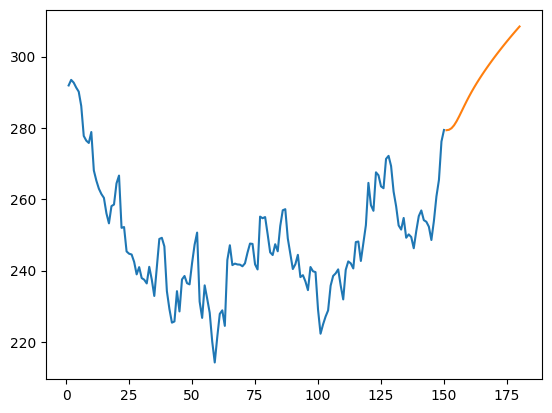

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[5689:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

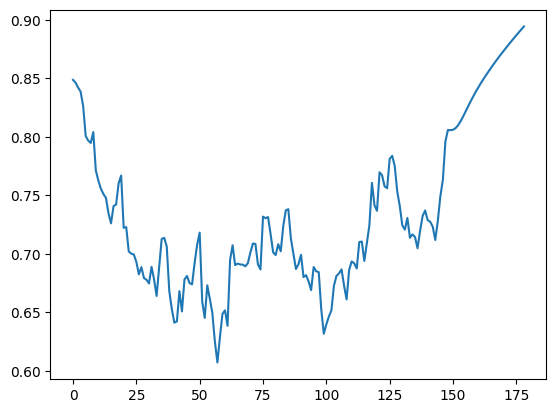

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[5690:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

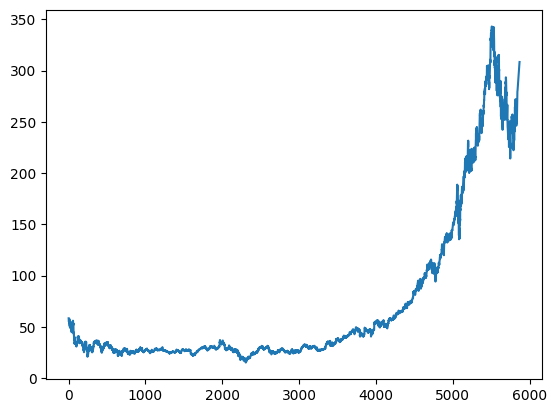

In [ ]:
plt.plot(df3)
